The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


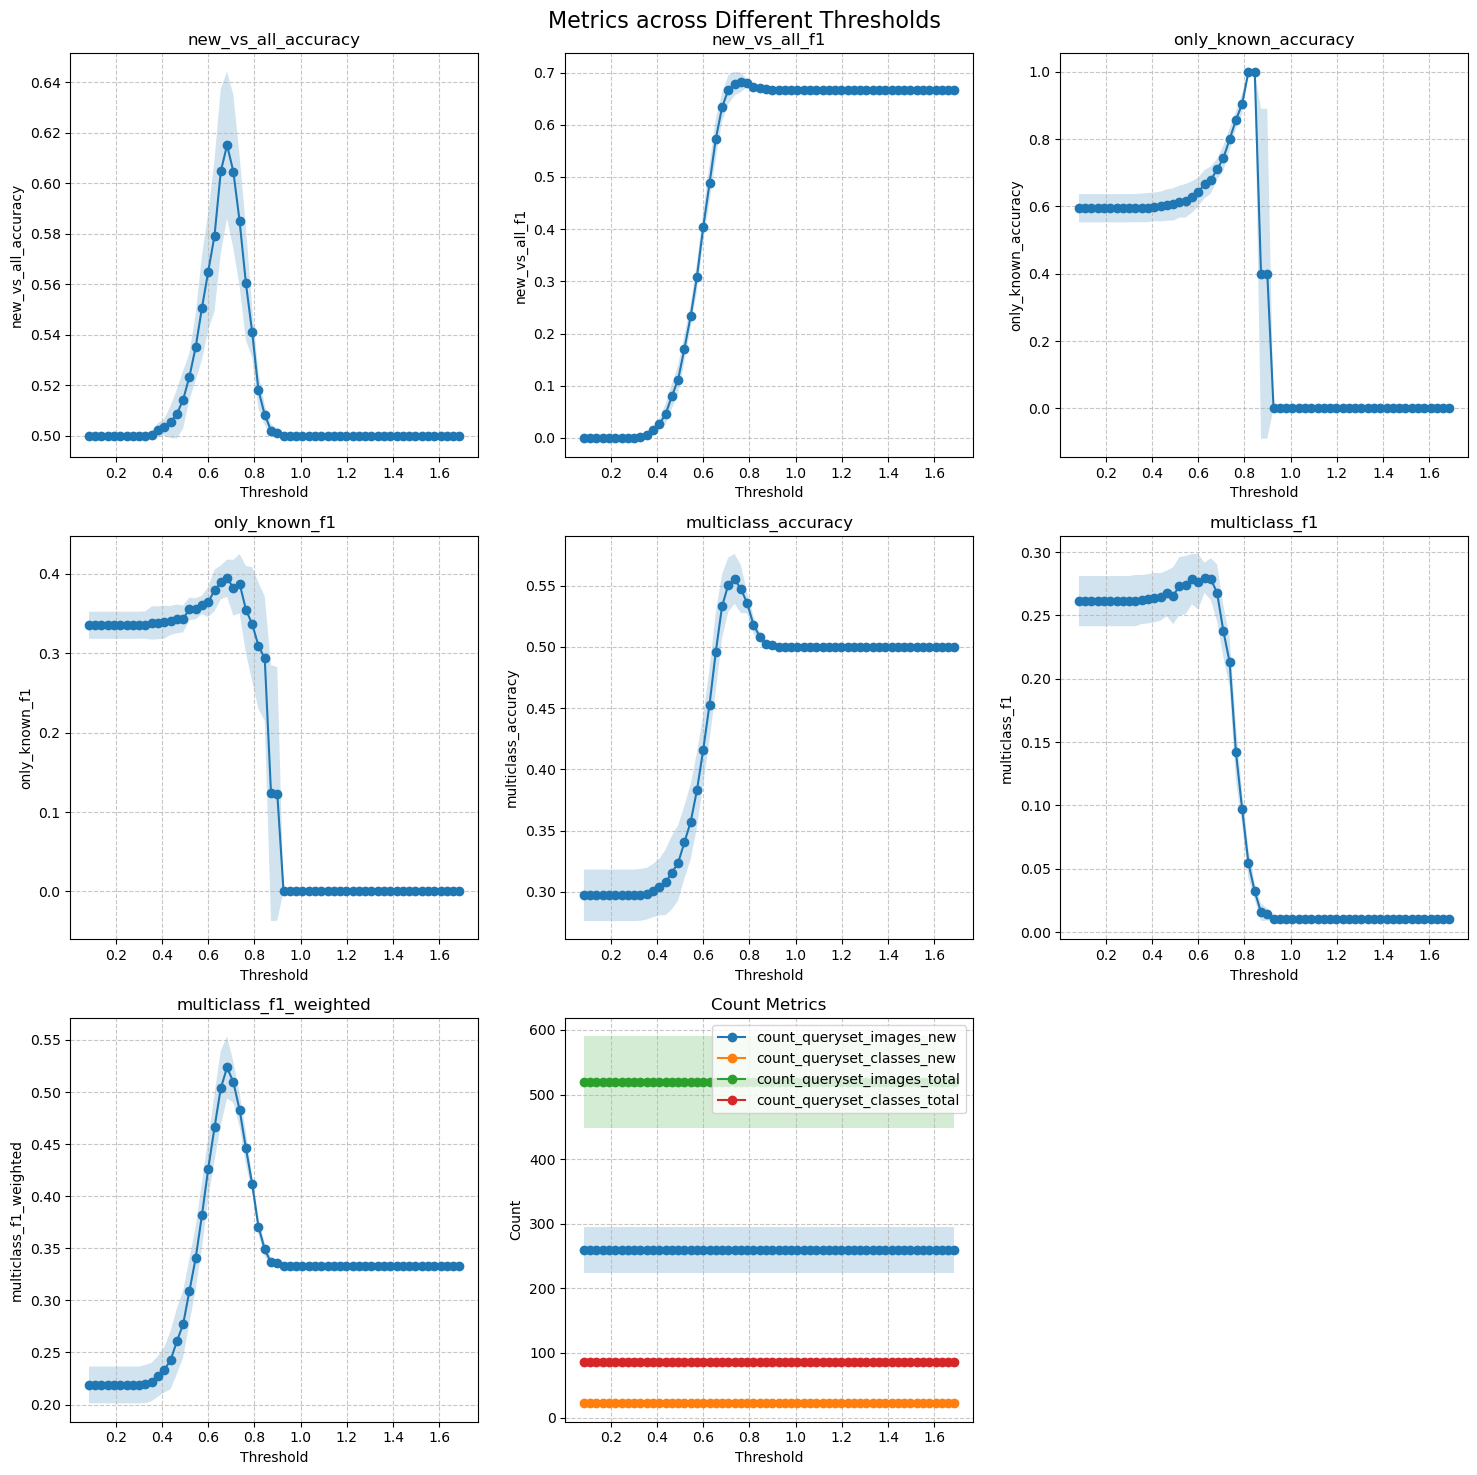

Optimal threshold for multiclass_f1_weighted: 0.6815270542515633
Mean multiclass_f1_weighted at optimal threshold: 0.5235
Std multiclass_f1_weighted at optimal threshold: 0.0299
0.6815270542515633


In [6]:
%load_ext autoreload
%autoreload 2

from gorillatracker.classification.clustering import EXT_MERGED_DF
from gorillatracker.classification.reid import run_knn_openset_recognition_cv, visualize_metrics, get_optimal_threshold, thresholds_selector
import numpy as np

edf = EXT_MERGED_DF

# Filter and prepare the data
metric = "cosine" 
df = edf[(edf["dataset"] == "SPAC+min3") & (edf["model"] == "EfN-Finetuned")].reset_index(drop=True)
method = "knn1"

thresholds = thresholds_selector(df, n_measures=60, metric=metric)
cv_results = run_knn_openset_recognition_cv(thresholds, df, method=method, construction_method="equal_classes", metric=metric)
visualize_metrics(cv_results, thresholds)
optimal_threshold_multiclass = get_optimal_threshold(cv_results, metric="multiclass_f1_weighted")
print(optimal_threshold_multiclass)

Running 1 configurations at resolution 100...


  0%|          | 0/1 [00:00<?, ?it/s]

Started sweep for dataset 'SPAC+min3', model 'ViT-Finetuned', labelling method 'knn1', and selector method 'equal_classes'


100%|██████████| 1/1 [00:48<00:00, 48.99s/it]

Optimal threshold for multiclass_f1: 0.6391573042941269
Mean multiclass_f1 at optimal threshold: 0.7111
Std multiclass_f1 at optimal threshold: 0.0505
Completed sweep for dataset 'SPAC+min3', model 'ViT-Finetuned', labelling method 'knn1', and selector method 'equal_classes' (cosine)


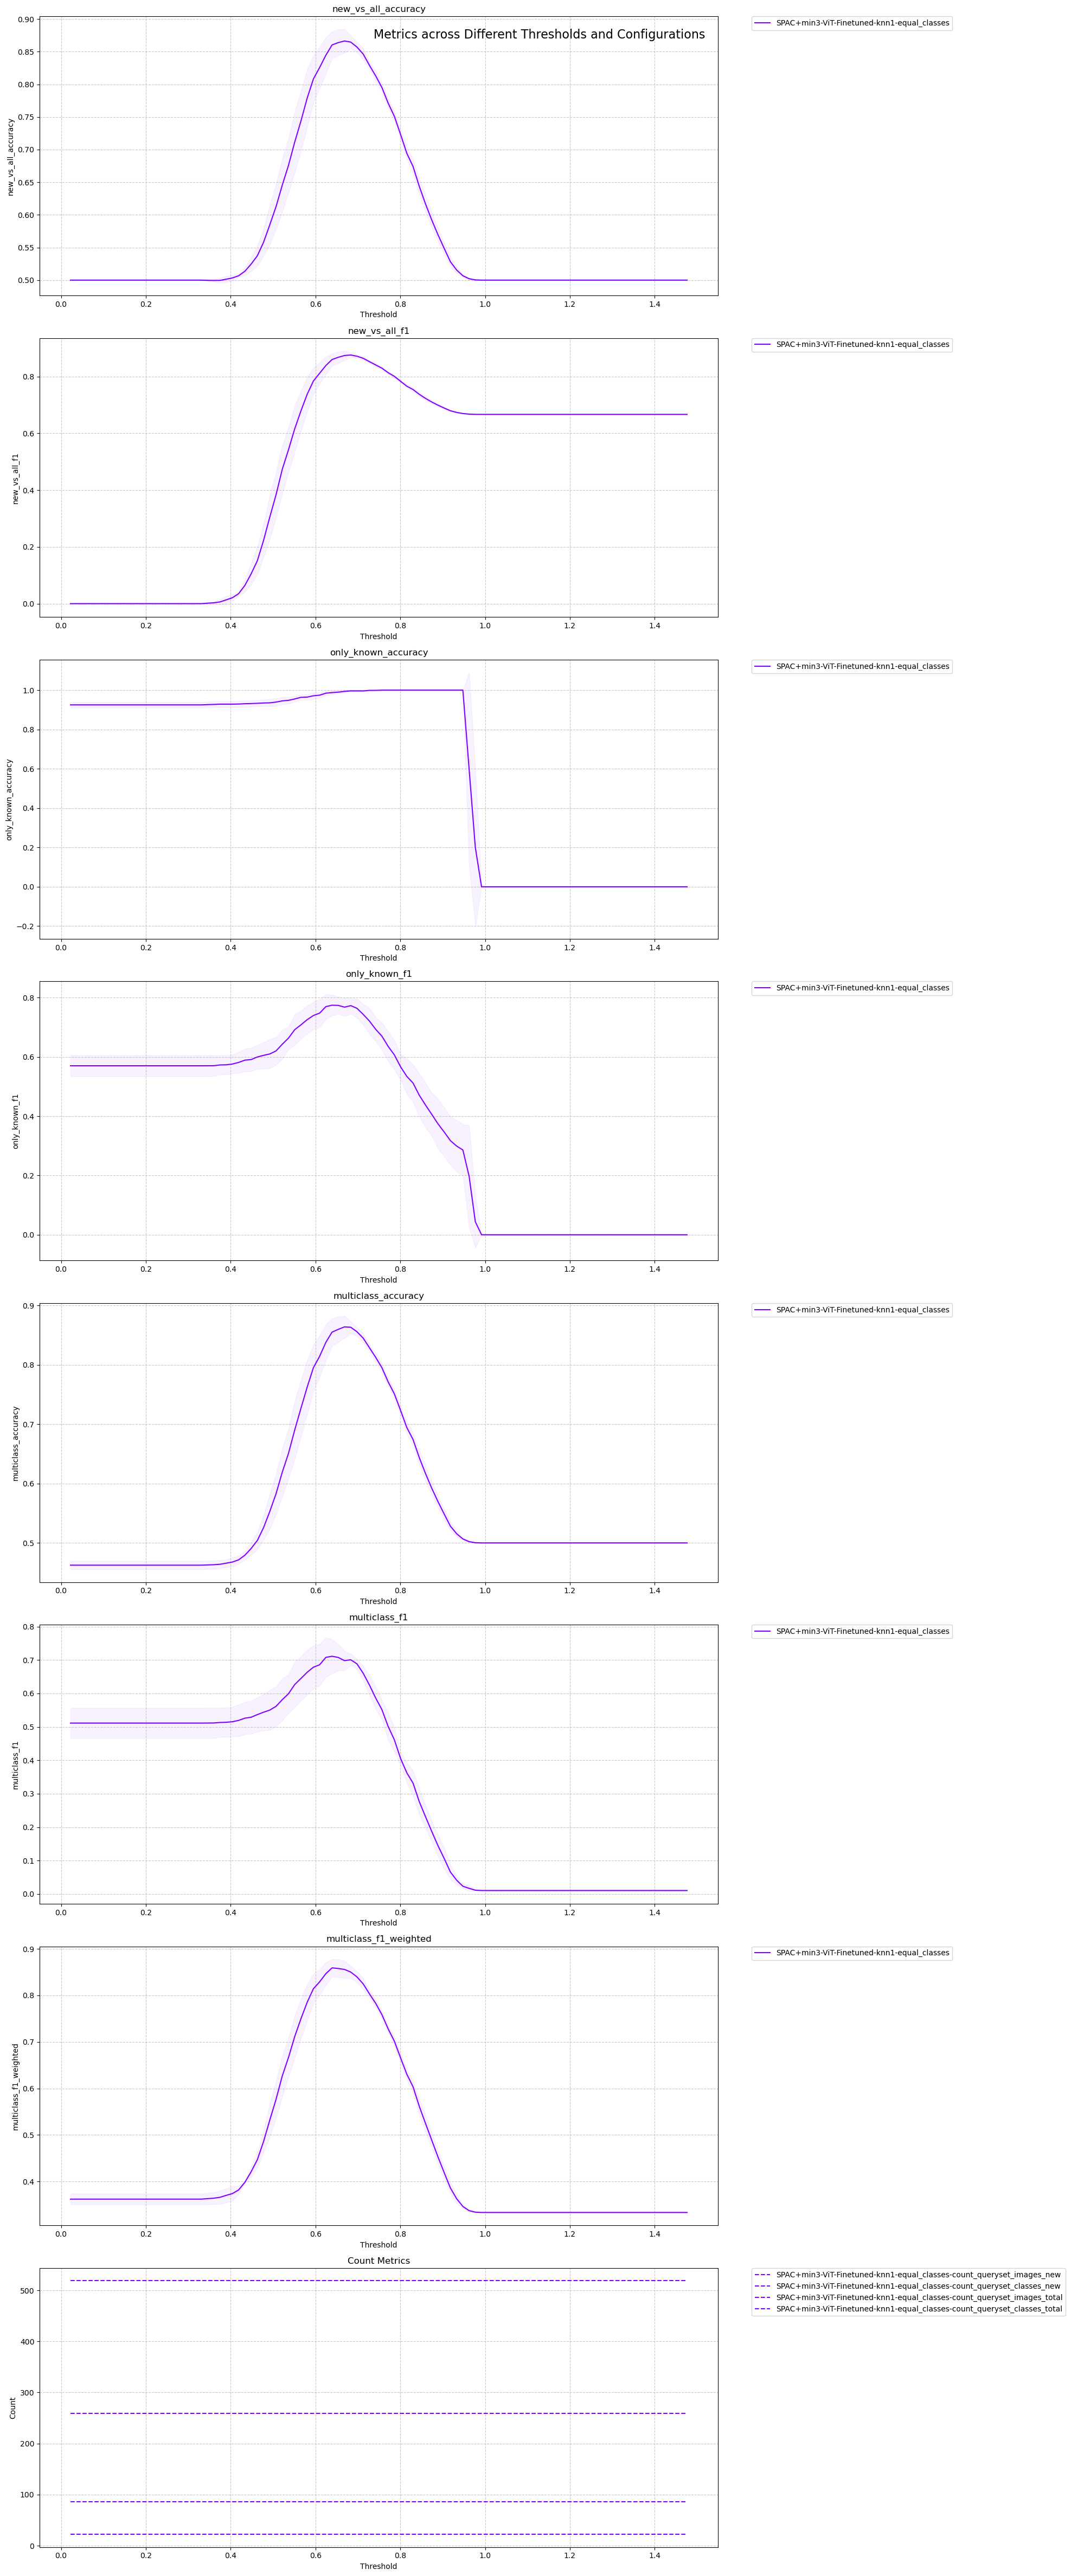

In [8]:
from gorillatracker.classification.reid import sweep_configs, batch_visualize_metrics

partial = [
    ("SPAC+min3", "ViT-Finetuned", "knn1", "equal_classes"),
    # ("SPAC+min3+max10", "ViT-Finetuned", "knn1centroid", "equal_classes"),
    # ("SPAC+min3+max10", "ViT-Finetuned", "knn1centroid_iqr", "equal_classes"),
]
results = sweep_configs(EXT_MERGED_DF, partial, resolution=100, metric="cosine")
results = batch_visualize_metrics(results, partial)